# <center><font color = '#DF9166' size = 20 center> **User Engagement Analysis**</font></center>




## <font color = '#DF9166' size=6>**Table of content**<font/><a class = 'anchor' id = 'introduction'/>

1. [**Import Libraries**](#import)
2. [**Data Loading**](#data_loading)
3. [**Data Inspection**](#data_inspection)
4. [**Data Preprocessing**](#data_preprocessing)
5. [**Engagement Metrics Analysis**](#engagement_metrics)
6. [**Cluster Analysis**](#cluster_analysis)
7. [**Application-Specific Analysis**](#app_analysis)

## <font color = '#DF9166' size=6>**Import Libraries**</font><a class = 'anchor' id = 'import'/>


In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.pardir))

In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [3]:
from src.utils.plot import generate_hist_box_plots

In [4]:
warnings.filterwarnings('ignore')

In [5]:
sns.set_style("whitegrid")

In [6]:
pd.set_option("display.max_colwidth", None)
pd.set_option('display.max_columns', None)

## <font color = '#DF9166' size=6>**Data Loading**</font><a class = 'anchor' id = 'data_loading'/>

In [7]:
DATA_PATH = 'C:/dev/Side-Projects/10 Acadamy/W2 Challenge/User Engagement and Satisfaction Analysis/data/cleaned_telecom_data.csv'

In [8]:
df = pd.read_csv(DATA_PATH).drop(['Unnamed: 0'], axis=1)
df.head(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,105129.387473,208201448079117,33664962239,35521209507511,9.16456699548519E+015,42.0,5.0,23.0,44.0,2.103058e+07,771882.022325,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.162868e+08,3.291068e+06,37624.0,38787.0,1.051299e+08,Samsung,Samsung Galaxy A5 Sm-A520F,999.337217,344.396838,820.561387,150.489103,976.53392,142.794436,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,105129.387473,208201909211140,33681854413,35794009006359,L77566A,65.0,5.0,16.0,26.0,2.103058e+07,771882.022325,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.162868e+08,3.291068e+06,168.0,3560.0,1.051299e+08,Samsung,Samsung Galaxy J5 (Sm-J530),999.337217,344.396838,820.561387,150.489103,976.53392,142.794436,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0


## <font color = '#DF9166' size=6>**Data Inspection**</font><a class = 'anchor' id = 'data_inspection'/>

In [9]:
print(f"Shape of the Dataset: {df.shape}")

Shape of the Dataset: (148346, 55)


In [10]:
print("Dataset Info:\n")
df.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148346 entries, 0 to 148345
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 148346 non-null  uint64 
 1   Start                                     148346 non-null  object 
 2   Start ms                                  148346 non-null  float64
 3   End                                       148346 non-null  object 
 4   End ms                                    148346 non-null  float64
 5   Dur. (ms)                                 148346 non-null  float64
 6   IMSI                                      148346 non-null  int64  
 7   MSISDN/Number                             148346 non-null  int64  
 8   IMEI                                      148346 non-null  int64  
 9   Last Location Name                        148346 non-null  object 
 10  Avg R

## <font color = '#DF9166' size=6>**Data Preprocessing**<font/><a class = 'anchor' id = 'data_preprocessing'/>


### Feature Selection

In [11]:
SELECTED_COLUMNS = [
    "Bearer Id",
    "MSISDN/Number",
    "Dur. (ms)",
    "Total DL (Bytes)",
    "Total UL (Bytes)",
]

In [12]:
filtered_data = df[SELECTED_COLUMNS]
filtered_data.head(2)

,Bearer Id,MSISDN/Number,Dur. (ms),Total DL (Bytes),Total UL (Bytes)
0,13114483460844900352,33664962239,105129.387473,308879636.0,36749741.0
1,13114483482878900224,33681854413,105129.387473,653384965.0,53800391.0


### Aggregation

In [13]:
# Calculate total metrics per customer (MSISDN/Number)
aggregated_data = (
    filtered_data.groupby("MSISDN/Number")
    .agg(
        Total_Session_Frequency=("Bearer Id", "count"),
        Total_Session_Duration=("Dur. (ms)", "sum"),
        Total_DL_Traffic=("Total DL (Bytes)", "sum"),
        Total_UL_Traffic=("Total UL (Bytes)", "sum"),
    )
    .reset_index()
)

# Add Total_DL_Traffic and Total_UL_Traffic to get Total_Traffic
aggregated_data["Total_Traffic"] = (
    aggregated_data["Total_DL_Traffic"] + aggregated_data["Total_UL_Traffic"]
)

aggregated_data.head()

,MSISDN/Number,Total_Session_Frequency,Total_Session_Duration,Total_DL_Traffic,Total_UL_Traffic,Total_Traffic
0,33601001722,1,116720.0,8.426375e+08,36053108.0,8.786906e+08
1,33601001754,1,181230.0,1.207552e+08,36104459.0,1.568596e+08
2,33601002511,1,134969.0,5.566597e+08,39306820.0,5.959665e+08
3,33601007832,1,49878.0,4.019932e+08,20327526.0,4.223207e+08
4,33601008617,2,37104.0,1.363130e+09,94280527.0,1.457411e+09


In [14]:
aggregated_data.shape

(106352, 6)

In [15]:
aggregated_data.nlargest(n=5, columns=['Total_Session_Frequency'])

,MSISDN/Number,Total_Session_Frequency,Total_Session_Duration,Total_DL_Traffic,Total_UL_Traffic,Total_Traffic
13451,33626320676,18,2.047644e+06,7.301517e+09,669650721.0,7.971167e+09
6394,33614892860,17,1.940622e+06,8.156743e+09,689483001.0,8.846226e+09
13107,33625779332,17,1.898738e+06,7.770043e+09,729577380.0,8.499621e+09
36867,33659725664,16,2.092782e+06,7.081602e+09,624260321.0,7.705863e+09
75999,33675877202,15,1.932435e+06,7.309542e+09,581568792.0,7.891111e+09


## <font color = '#DF9166' size=6>**Engagement Metrics Analysis**<font/><a class = 'anchor' id = 'engagement_metrics'/>

In [16]:
top_10_session_frequency = aggregated_data.nlargest(10, 'Total_Session_Frequency')

# Display the top 10 customers for each metric in tabular format
print("Top 10 Customers by Session Frequency:")
top_10_session_frequency[['MSISDN/Number', 'Total_Session_Frequency']]

Top 10 Customers by Session Frequency:


,MSISDN/Number,Total_Session_Frequency
13451,33626320676,18
6394,33614892860,17
13107,33625779332,17
36867,33659725664,16
75999,33675877202,15
92486,33760536639,15
64825,33667163239,13
656,33603127838,12
1267,33604515716,12
13918,33627080969,12


The Top 10 Customers by Total Traffic are the most data-intensive users, driving significant network activity through high download and upload volumes. These customers likely engage heavily in streaming, gaming, or other data-heavy applications. They represent a high-value segment for the telecom provider, requiring targeted resource allocation to maintain service quality. Additionally, analyzing their app usage can reveal trends and opportunities for tailored plans or service enhancements to boost retention and revenue.

In [17]:
top_10_session_duration = aggregated_data.nlargest(10, 'Total_Session_Duration')
print("\nTop 10 Customers by Session Duration:")
top_10_session_duration[['MSISDN/Number', 'Total_Session_Duration']]


Top 10 Customers by Session Duration:


,MSISDN/Number,Total_Session_Duration
36867,33659725664,2.092782e+06
13451,33626320676,2.047644e+06
6394,33614892860,1.940622e+06
75999,33675877202,1.932435e+06
13107,33625779332,1.898738e+06
92486,33760536639,1.857118e+06
35256,33659359429,1.822916e+06
56977,33664712899,1.623717e+06
105638,33786323068,1.577650e+06
64825,33667163239,1.434468e+06


The **Top 10 Customers by Session Duration** exhibit durations ranging from **~1.4 million ms (23.9 minutes)** to **~2.09 million ms (34.88 minutes)**. This indicates heavy, consistent usage, likely involving bandwidth-intensive activities. Such customers are prime targets for high-value service plans and demand optimal network support.

In [18]:
top_10_total_traffic = aggregated_data.nlargest(10, 'Total_Traffic')
print("\nTop 10 Customers by Total Traffic:")
top_10_total_traffic[['MSISDN/Number', 'Total_Traffic']]


Top 10 Customers by Total Traffic:


,MSISDN/Number,Total_Traffic
6394,33614892860,8.846226e+09
92486,33760536639,8.514774e+09
13107,33625779332,8.499621e+09
13451,33626320676,7.971167e+09
75999,33675877202,7.891111e+09
36867,33659725664,7.705863e+09
62746,33666464084,7.308501e+09
92141,33760413819,7.132371e+09
56977,33664712899,6.903963e+09
86045,33698792269,6.540899e+09


The **Top 10 Customers by Total Traffic** show data consumption ranging from **~6.5 billion bytes (~6.07 GB)** to **~8.85 billion bytes (~8.24 GB)**. These users are highly data-intensive, engaging in activities like streaming or heavy downloads. The top user, with over **8.24 GB usage**, significantly outpaces others, highlighting potential reliance on high-speed, high-capacity plans.

In [19]:
print("Descriptive statistics for the aggregated data:\n")
aggregated_data.describe()

Descriptive statistics for the aggregated data:



,MSISDN/Number,Total_Session_Frequency,Total_Session_Duration,Total_DL_Traffic,Total_UL_Traffic,Total_Traffic
count,1.063520e+05,106352.000000,1.063520e+05,1.063520e+05,1.063520e+05,1.063520e+05
mean,4.516896e+10,1.394859,1.301894e+05,6.342416e+08,5.735408e+07,6.915957e+08
std,2.896262e+12,0.806716,1.036805e+05,4.650153e+08,3.564337e+07,4.915408e+08
min,3.360100e+10,1.000000,7.142000e+03,8.827082e+06,9.512288e+06,3.324901e+07
25%,3.365088e+10,1.000000,7.272950e+04,3.150695e+08,3.643178e+07,3.588566e+08
50%,3.366365e+10,1.000000,1.032470e+05,5.707748e+08,4.679698e+07,6.183873e+08
75%,3.368344e+10,2.000000,1.700085e+05,8.078752e+08,6.577346e+07,8.578969e+08
max,8.823971e+14,18.000000,2.092782e+06,8.156743e+09,7.295774e+08,8.846226e+09


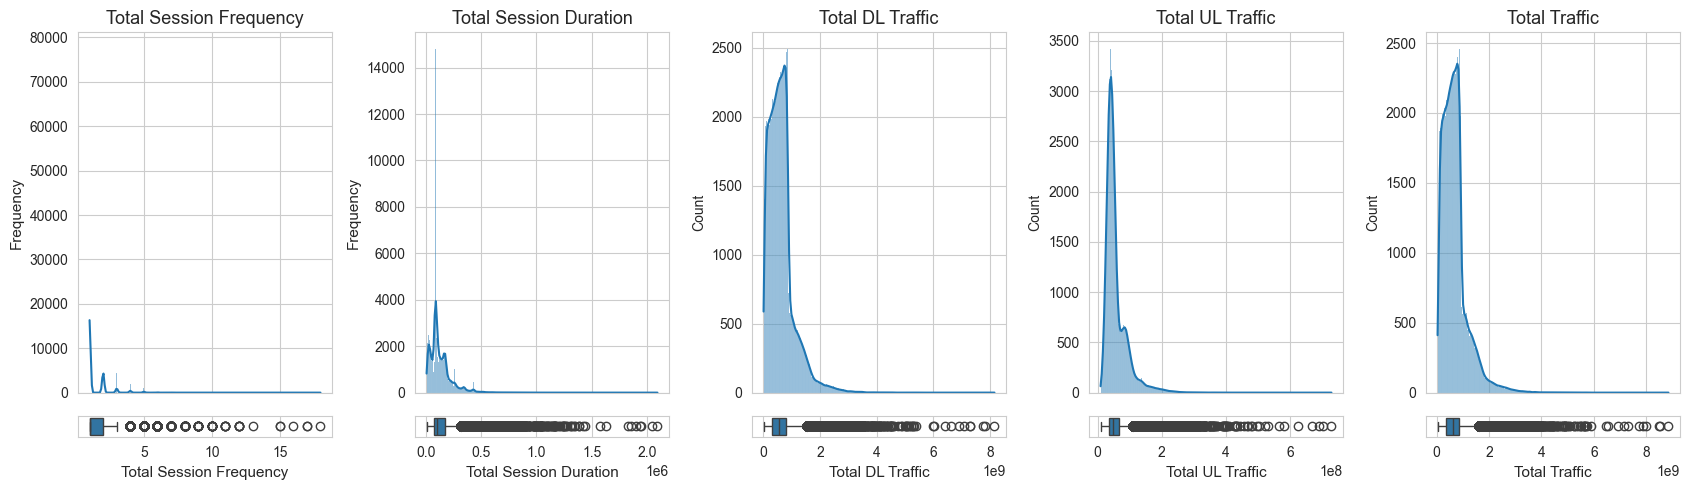

In [20]:
plot_data = [
    {"title": "Total Session Frequency", "column": "Total_Session_Frequency", "label": "Total Session Frequency"},
    {"title": "Total Session Duration", "column": "Total_Session_Duration", "label": "Total Session Duration"},
    {"title": "Total DL Traffic", "column": "Total_DL_Traffic", "label": "Total DL Traffic"},
    {"title": "Total UL Traffic", "column": "Total_UL_Traffic", "label": "Total UL Traffic"},
    {"title": "Total Traffic", "column": "Total_Traffic", "label": "Total Traffic"},
]

generate_hist_box_plots(aggregated_data, plot_data)


**Insights:**

- **Highly Active Users:** A small group of users account for the majority of data traffic, with the maximum session frequency at **18**, session duration at **~34.88 minutes**, and total traffic at **~8.85 GB**.
- **Long Tail Distribution:** Most users show low engagement, with the median session frequency at **1**, duration at **~1.03 minutes**, and total traffic at **~618 MB**, while a few highly active users generate disproportionately high traffic.
- **Data Consumption Disparity:** Download traffic (mean of **~634 MB**) significantly exceeds upload traffic (mean of **~57 MB**) on average across all users.
- **Resource Allocation Potential:** The variability in user engagement (e.g., max total traffic at **~8.85 GB** vs. min at **~33 MB**) suggests opportunities for targeted resource allocation to support highly active users.

## <font color = '#DF9166' size=6>**Cluster Analysis**<font/><a class = 'anchor' id = 'cluster_analysis'/>

### Normalization

In [42]:
aggregated_data

,MSISDN/Number,Total_Session_Frequency,Total_Session_Duration,Total_DL_Traffic,Total_UL_Traffic,Total_Traffic
0,33601001722,1,116720.000000,8.426375e+08,36053108.0,8.786906e+08
1,33601001754,1,181230.000000,1.207552e+08,36104459.0,1.568596e+08
2,33601002511,1,134969.000000,5.566597e+08,39306820.0,5.959665e+08
3,33601007832,1,49878.000000,4.019932e+08,20327526.0,4.223207e+08
4,33601008617,2,37104.000000,1.363130e+09,94280527.0,1.457411e+09
...,...,...,...,...,...,...
106347,33789996170,1,8810.000000,6.879252e+08,26716429.0,7.146416e+08
106348,33789997247,1,140988.000000,4.445751e+08,35732243.0,4.803073e+08
106349,3197020876596,1,105129.387473,1.948281e+08,37295915.0,2.321240e+08
106350,337000037000919,1,105129.387473,5.396350e+08,56652839.0,5.962878e+08


In [41]:
metrics_to_normalize = aggregated_data.columns.drop('MSISDN/Number')

scaler = MinMaxScaler()
normalized_data = aggregated_data.copy()
normalized_data[metrics_to_normalize] = scaler.fit_transform(aggregated_data[metrics_to_normalize])

normalized_data.head()


,MSISDN/Number,Total_Session_Frequency,Total_Session_Duration,Total_DL_Traffic,Total_UL_Traffic,Total_Traffic
0,33601001722,0.000000,0.052539,0.102334,0.036859,0.095931
1,33601001754,0.000000,0.083470,0.013737,0.036930,0.014026
2,33601002511,0.000000,0.061289,0.067236,0.041378,0.063851
3,33601007832,0.000000,0.020491,0.048254,0.015020,0.044148
4,33601008617,0.058824,0.014366,0.166215,0.117723,0.161598


### K-Means Clustering

In [43]:
kmeans = KMeans(n_clusters=3, random_state=42)
normalized_data['Cluster'] = kmeans.fit_predict(normalized_data[metrics_to_normalize])

# Display the clusters added to the data
normalized_data.head()

,MSISDN/Number,Total_Session_Frequency,Total_Session_Duration,Total_DL_Traffic,Total_UL_Traffic,Total_Traffic,Cluster
0,33601001722,0.000000,0.052539,0.102334,0.036859,0.095931,1
1,33601001754,0.000000,0.083470,0.013737,0.036930,0.014026,1
2,33601002511,0.000000,0.061289,0.067236,0.041378,0.063851,1
3,33601007832,0.000000,0.020491,0.048254,0.015020,0.044148,1
4,33601008617,0.058824,0.014366,0.166215,0.117723,0.161598,2


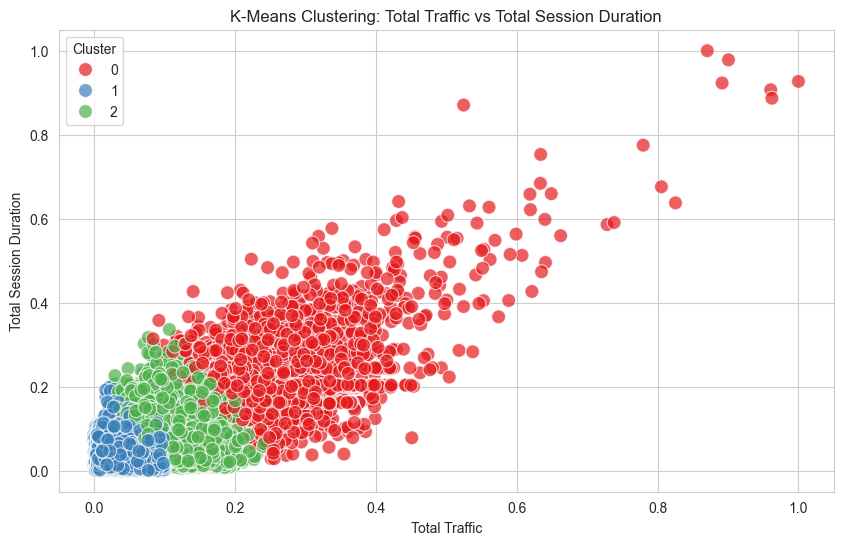

In [44]:
# 2D scatter plot of Total Traffic and Total Session Duration with Cluster as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Total_Traffic",
    y="Total_Session_Duration",
    hue="Cluster",
    palette="Set1",
    data=normalized_data,
    s=100,
    alpha=0.7,
    edgecolor="w",
)

# Labels and title
plt.xlabel("Total Traffic")
plt.ylabel("Total Session Duration")
plt.title("K-Means Clustering: Total Traffic vs Total Session Duration")
plt.legend(title="Cluster")
plt.show()


In [48]:
# Map the 'Cluster' values from normalized_data to the original df based on 'MSISDN/Number'
df = df.merge(normalized_data[['MSISDN/Number', 'Cluster']], on='MSISDN/Number', how='inner')

# Rename the 'Cluster' column to 'engagement_cluster'
df.rename(columns={'Cluster': 'engagement_cluster'}, inplace=True)

In [49]:
df.head(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),engagement_cluster
0,13114483460844900352,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,105129.387473,208201448079117,33664962239,35521209507511,9.16456699548519E+015,42.0,5.0,23.0,44.0,2.103058e+07,771882.022325,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.162868e+08,3.291068e+06,37624.0,38787.0,1.051299e+08,Samsung,Samsung Galaxy A5 Sm-A520F,999.337217,344.396838,820.561387,150.489103,976.53392,142.794436,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,2
1,13114483482878900224,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,105129.387473,208201909211140,33681854413,35794009006359,L77566A,65.0,5.0,16.0,26.0,2.103058e+07,771882.022325,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.162868e+08,3.291068e+06,168.0,3560.0,1.051299e+08,Samsung,Samsung Galaxy J5 (Sm-J530),999.337217,344.396838,820.561387,150.489103,976.53392,142.794436,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,2


In [50]:
df.to_csv('C:/dev/Side-Projects/10 Acadamy/W2 Challenge/User Engagement and Satisfaction Analysis/data/data_with_engagement_cluster.csv', index=False)

## <font color = '#DF9166' size=6>**Application-Specific Analysis**<font/><a class = 'anchor' id = 'app_analysis'/>

###  Traffic Aggregation per Application

In [25]:
# Define the applications and their respective traffic columns
applications = {
    "Social Media": ["Social Media DL (Bytes)", "Social Media UL (Bytes)"],
    "Google": ["Google DL (Bytes)", "Google UL (Bytes)"],
    "Email": ["Email DL (Bytes)", "Email UL (Bytes)"],
    "Youtube": ["Youtube DL (Bytes)", "Youtube UL (Bytes)"],
    "Netflix": ["Netflix DL (Bytes)", "Netflix UL (Bytes)"],
    "Gaming": ["Gaming DL (Bytes)", "Gaming UL (Bytes)"],
    "Other": ["Other DL (Bytes)", "Other UL (Bytes)"]
}

# Initialize a DataFrame to store total traffic for each application
app_traffic = pd.DataFrame()

# Aggregate traffic for each application
for app, cols in applications.items():
    app_traffic[app] = df[cols[0]] + df[cols[1]]

# Add MSISDN/Number for identifying users
app_traffic['MSISDN/Number'] = filtered_data['MSISDN/Number']

# Aggregate traffic per user (MSISDN)
aggregated_app_traffic = app_traffic.groupby('MSISDN/Number').agg(
    {app: 'sum' for app in applications.keys()}
).reset_index()

aggregated_app_traffic.head()

,MSISDN/Number,Social Media,Google,Email,Youtube,Netflix,Gaming,Other
0,33601001722,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
1,33601001754,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
2,33601002511,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0
3,33601007832,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
4,33601008617,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0


In [26]:
# Display the top 10 most engaged users per application
top_10_users_per_app = {}
for app in applications.keys():
    top_10_users_per_app[app] = aggregated_app_traffic.nlargest(10, app)[['MSISDN/Number', app]]

# Display top 10 users for each application
for app, top_10 in top_10_users_per_app.items():
    print(f"Top 10 Most Engaged Users for {app}:")
    print(top_10)
    print("\n")

Top 10 Most Engaged Users for Social Media:
        MSISDN/Number  Social Media
13451     33626320676    43374779.0
92486     33760536639    39783189.0
36867     33659725664    35412358.0
6394      33614892860    28294544.0
13107     33625779332    27135500.0
64825     33667163239    24247850.0
105638    33786323068    23974919.0
70635     33669068942    23800834.0
656       33603127838    23077825.0
60067     33665530316    22586033.0


Top 10 Most Engaged Users for Google:
        MSISDN/Number       Google
13451     33626320676  152191852.0
13107     33625779332  142307915.0
6394      33614892860  127973787.0
92486     33760536639  123223099.0
36867     33659725664  116516345.0
105638    33786323068  110254484.0
75999     33675877202  109860502.0
64825     33667163239  105032696.0
94208     33761268199   97089988.0
85904     33698756430   91935151.0


Top 10 Most Engaged Users for Email:
        MSISDN/Number       Email
13451     33626320676  42418782.0
6394      33614892860  40788

In [27]:
print("Descriptive statistics for application traffic:\n")
app_traffic.describe()

Descriptive statistics for application traffic:



,Social Media,Google,Email,Youtube,Netflix,Gaming,Other,MSISDN/Number
count,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05
mean,1.828061e+06,7.807873e+06,2.259106e+06,2.264303e+07,2.262935e+07,4.303894e+08,4.294285e+08,4.191542e+10
std,1.035639e+06,3.516809e+06,1.071225e+06,9.246986e+06,9.261040e+06,2.440545e+08,2.432324e+08,2.452297e+12
min,1.563000e+03,4.033000e+04,8.359000e+03,7.890300e+04,9.843200e+04,3.063580e+05,1.490450e+05,3.360100e+10
25%,9.321075e+05,4.944519e+06,1.359097e+06,1.599400e+07,1.597961e+07,2.187727e+08,2.186225e+08,3.365131e+10
50%,1.825882e+06,7.815536e+06,2.263982e+06,2.266287e+07,2.263638e+07,4.316914e+08,4.300709e+08,3.366371e+10
75%,2.727520e+06,1.068304e+07,3.160082e+06,2.929824e+07,2.928832e+07,6.415440e+08,6.399038e+08,3.368352e+10
max,3.650861e+06,1.552878e+07,4.518036e+06,4.519008e+07,4.519815e+07,8.592028e+08,8.595209e+08,8.823971e+14


**Key Insights from Application Traffic Statistics:**

1. **Application-Specific Usage Trends:**
   - **Gaming** and **Other Applications** dominate in traffic, averaging **~430 MB each**, indicative of high engagement in these categories.
   - **Social Media** and **Google** have significantly lower averages at **~1.8 MB** and **~7.8 MB**, reflecting lighter usage patterns.

2. **Variability in Traffic:**
   - **Gaming** and **Other Applications** show the highest variability, with standard deviations of **244 MB** and **243 MB** respectively, suggesting diverse usage intensity among users.
   - This highlights user segmentation, where some are casual users while others are extremely active.

3. **Peak Usage:**
   - Maximum traffic reaches **~859 MB** for **Gaming** and **Other Applications**, significantly exceeding **Social Media**'s peak of **~3.65 MB**, emphasizing the strain heavy users place on specific app categories.

4. **Traffic Distribution:**
   - At the **75th percentile**, **Gaming** and **Other Applications** exceed **~640 MB**, reflecting high activity levels among the top 25% of users.
   - In contrast, **Social Media** and **Google** remain at **~2.7 MB** and **~10.7 MB**, reinforcing their role as lighter traffic generators.

5. **Opportunities for Optimization:**
   - Network resources could be optimized by prioritizing bandwidth and performance enhancements for **Gaming** and **Other Applications** to ensure a quality experience for heavy users.
   - Strategies to encourage increased engagement in lower traffic categories like **Social Media** and **Google** could balance overall network load.

These findings underline the importance of application-level insights for tailoring services and infrastructure investments.

In [65]:
# Aggregating the total traffic for each application
app_columns = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
total_traffic_per_app = aggregated_app_traffic[app_columns].sum()
total_traffic_per_app

Social Media    2.711855e+11
Google          1.158267e+12
Email           3.351293e+11
Youtube         3.359002e+12
Netflix         3.356973e+12
Gaming          6.384655e+13
Other           6.370400e+13
dtype: float64

In [ ]:
# Aggregating the total traffic for each application
app_columns = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
total_traffic_per_app = aggregated_app_traffic[app_columns].sum()
total_traffic_per_app

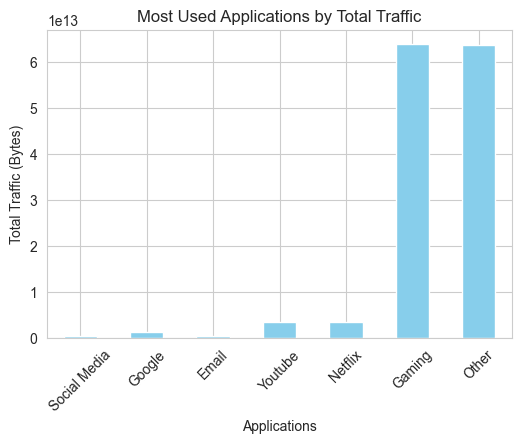

In [29]:
# Bar chart for top 3 applications
plt.figure(figsize=(6, 4))
total_traffic_per_app.plot(kind='bar', color='skyblue')
plt.title('Most Used Applications by Total Traffic')
plt.ylabel('Total Traffic (Bytes)')
plt.xlabel('Applications')
plt.xticks(rotation=45)
plt.show()


In [30]:
# Sorting the applications by total traffic in descending order
top_3_apps = total_traffic_per_app.sort_values(ascending=False).head(3)
print(top_3_apps)

Gaming     6.384655e+13
Other      6.370400e+13
Youtube    3.359002e+12
dtype: float64


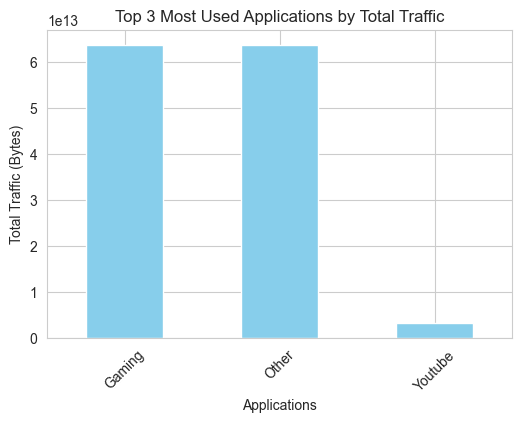

In [31]:
# Bar chart for top 3 applications
plt.figure(figsize=(6, 4))
top_3_apps.plot(kind='bar', color='skyblue')
plt.title('Top 3 Most Used Applications by Total Traffic')
plt.ylabel('Total Traffic (Bytes)')
plt.xlabel('Applications')
plt.xticks(rotation=45)
plt.show()


**Key Insights:**
- **Dominance of Gaming and Other Applications:**  Gaming and Other applications lead in data consumption, each accounting for **6.38e+13** and **6.37e+13** bytes respectively. This underscores their high demand for network resources.
- **Significant Impact of Video Streaming:** YouTube and Netflix rank next, with approximately **3.36e+12** bytes each. This aligns with the heavy bandwidth requirements of video streaming services.
- **Moderate Usage by Google and Email:**  Google traffic totals **1.16e+12** bytes, while Email traffic is much lower at **3.35e+11** bytes, reflecting their relatively lightweight data demands.
- **Lower Data Consumption by Social Media:**  Social Media generates the least traffic at **2.71e+11** bytes, suggesting less intensive use compared to other categories.

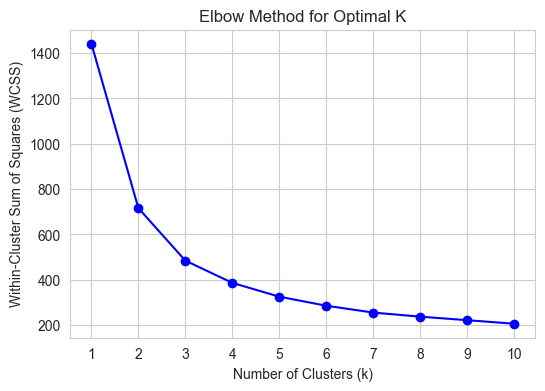

In [32]:
# Define the number of clusters to test
k_values = range(1, 11)  # Testing for k=1 to k=10
wcss = []

# Loop over different values of k to compute WCSS
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(normalized_data[metrics_to_normalize])  # Use normalized engagement metrics for clustering
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(6, 4))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


The WCSS values decrease rapidly as k increases from 1 to 3, with diminishing returns beyond that. The most significant drop occurs between k = 1 (6.70) and k = 3 (0.71), and further increases in k show minimal improvement. Therefore, k = 3 is the optimal number of clusters, balancing cluster quality and simplicity.






